In [1]:
                    '''    SOFT VECTOR CLASSIFIER - or - SUPPORT VECTOR MACHINE     '''

'    SOFT VECTOR CLASSIFIER - or - SUPPORT VECTOR MACHINE     '

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

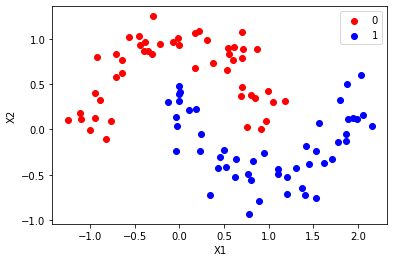

In [5]:
###################################################################################################################
#                                   ''' Import the iris dataset '''                                    
###################################################################################################################
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15)

df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Y'] = pd.Series(y)

plt.scatter(df[df['Y']==0]['X1'], df[df['Y']==0]['X2'], label='0', color='red')
plt.scatter(df[df['Y']==1]['X1'], df[df['Y']==1]['X2'], label='1', color='blue')

# Prettify the graph
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

# # scale
# plt.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x1 scale by own
# plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x2 scale by own

# display
plt.show()

In [ ]:
# --------- TODO
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
# for each model plot with the data

Text(0.5, 0, 'Y')

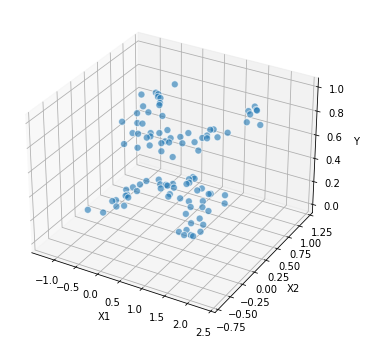

In [4]:

# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['X1']
ys = df['X2']
zs = df['Y']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

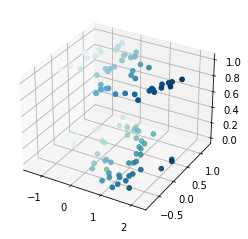

Text(0.5, 0, 'Y')

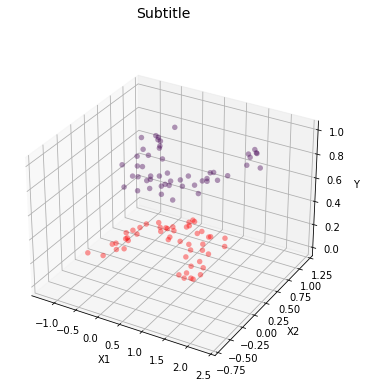

In [5]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Subtitle', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df['X1'])
ys = list(df['X2'])
zs = list(df['Y'])
data_points = [(x, y1, z) for x, y1, z in zip(xs, ys, zs)]
colors = ['red' if y1 == 0 else 1 for y1 in list(df['Y'])]

for data, color in zip(data_points, colors):
    x, y1, z = data
    ax.scatter(x, y1, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

In [6]:
###################################################################################################################
#                                     ''' Training a POLYNOMIAL SVM '''                                        
###################################################################################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [7]:
obtained = polynomial_svm_clf.predict(X)
expected = y

(obtained == expected).sum()

99

In [37]:
###################################################################################################################
#                                   ''' Training a Polynomial KERNEL SVM '''  
# @degree: polynomial degree. The higher its value the more the model will overfit
#                             The lower its value the more the model will underfit
# @coef0:  hyperparameter to controls how much the model is influenced by the degree.
###################################################################################################################
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [38]:
obtained = poly_kernel_svm_clf.predict(X)
expected = y

(obtained == expected).sum()

99

In [10]:
###################################################################################################################
#                      ''' Training a RBF KERNEL (Radial Basis Function Kernel) SVM '''                                        
###################################################################################################################
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [11]:
obtained = rbf_kernel_svm_clf.predict(X)
expected = y

confusion_matrix(expected, obtained)

array([[50,  0],
       [ 1, 49]])

In [13]:
###################################################################################################################
#                                   ''' Training a Linear SVM Regressor '''                                        
###################################################################################################################
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [14]:
obtained = svm_reg.predict(X)
expected = y

confusion_matrix(expected, obtained)

array([[50,  0],
       [50,  0]])